<h1 align='center'>NBA SUPERVISED LEARNING CAPSTONE</h1>
<h2 align='center'>Philip Bowman</h2>

## Part 2: NBA Data Cleaning and Exploration
1. [NBA Data Aggregation](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Data_Aggregation.ipynb)
2. [NBA Data Cleaning and Exploration](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Data_Cleaning_Exploration.ipynb)*
3. [NBA Modeling](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Modeling.ipynb)
4. [NBA Model Testing](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Model_Testing.ipynb)

## Purpose:
To explain, clean and explore the aggregated data from `nba_agg_data.csv` (aggregated in the prior notebook, [NBA Data Aggregation](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Data_Aggregation.ipynb)). Then execute feature engineering on our features to get them into a predictive format. Finally, limit those features to only those that are essential to explaining most of variance for the outcome variable. In essense, this is the Exploratory Data Analysis of the aggregated NBA regular season game level box score/standings/betting data spanning the 2012-2013 to 2017-2018 seasons (6 seasons).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 500)

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Import the data and take a quick look at the dataframe.

In [2]:
df = pd.read_csv('C:/Users/philb/Google Drive/Thinkful/Thinkful_repo/projects/supervised_capstone/Export Data/nba_agg_data.csv')
df.head()

,gameID,seasID,gmDate,gmTime,seasTyp,teamAbbr_A,teamConf_A,teamDiv_A,teamLoc_A,teamRslt_A,teamMin_A,teamDayOff_A,teamPTS_A,teamAST_A,teamTO_A,teamSTL_A,teamBLK_A,teamPF_A,teamFGA_A,teamFGM_A,teamFG%_A,team2PA_A,team2PM_A,team2P%_A,team3PA_A,team3PM_A,team3P%_A,teamFTA_A,teamFTM_A,teamFT%_A,teamORB_A,teamDRB_A,teamTRB_A,teamPTS1_A,teamPTS2_A,teamPTS3_A,teamPTS4_A,teamPTS5_A,teamPTS6_A,teamPTS7_A,teamPTS8_A,teamTREB%_A,teamASST%_A,teamTS%_A,teamEFG%_A,teamOREB%_A,teamDREB%_A,teamTO%_A,teamSTL%_A,teamBLK%_A,teamBLKR_A,teamPPS_A,teamFIC_A,teamFIC40_A,teamOrtg_A,teamDrtg_A,teamEDiff_A,teamPlay%_A,teamAR_A,teamAST/TO_A,teamSTL/TO_A,poss_A,pace_A,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr_B,teamConf_B,teamDiv_B,teamLoc_B,teamRslt_B,teamMin_B,teamDayOff_B,teamPTS_B,teamAST_B,teamTO_B,teamSTL_B,teamBLK_B,teamPF_B,teamFGA_B,teamFGM_B,teamFG%_B,team2PA_B,team2PM_B,team2P%_B,team3PA_B,team3PM_B,team3P%_B,teamFTA_B,teamFTM_B,teamFT%_B,teamORB_B,teamDRB_B,teamTRB_B,teamPTS1_B,teamPTS2_B,teamPTS3_B,teamPTS4_B,teamPTS5_B,teamPTS6_B,teamPTS7_B,teamPTS8_B,teamTREB%_B,teamASST%_B,teamTS%_B,teamEFG%_B,teamOREB%_B,teamDREB%_B,teamTO%_B,teamSTL%_B,teamBLK%_B,teamBLKR_B,teamPPS_B,teamFIC_B,teamFIC40_B,teamOrtg_B,teamDrtg_B,teamEDiff_B,teamPlay%_B,teamAR_B,teamAST/TO_B,teamSTL/TO_B,poss_B,pace_B,rank_A,rankOrd_A,gameWon_A,gameLost_A,stk_A,stkType_A,stkTot_A,gameBack_A,ptsFor_A,ptsAgnst_A,homeWin_A,homeLoss_A,awayWin_A,awayLoss_A,confWin_A,confLoss_A,lastFive_A,lastTen_A,gamePlay_A,ptsScore_A,ptsAllow_A,ptsDiff_A,opptGmPlay_A,opptGmWon_A,opptOpptGmPlay_A,opptOpptGmWon_A,sos_A,rel%Indx_A,mov_A,srs_A,pw%_A,pyth%13.91_A,wpyth13.91_A,lpyth13.91_A,pyth%16.5_A,wpyth16.5_A,lpyth16.5_A,rank_B,rankOrd_B,gameWon_B,gameLost_B,stk_B,stkType_B,stkTot_B,gameBack_B,ptsFor_B,ptsAgnst_B,homeWin_B,homeLoss_B,awayWin_B,awayLoss_B,confWin_B,confLoss_B,lastFive_B,lastTen_B,gamePlay_B,ptsScore_B,ptsAllow_B,ptsDiff_B,opptGmPlay_B,opptGmWon_B,opptOpptGmPlay_B,opptOpptGmWon_B,sos_B,rel%Indx_B,mov_B,srs_B,pw%_B,pyth%13.91_B,wpyth13.91_B,lpyth13.91_B,pyth%16.5_B,wpyth16.5_B,lpyth16.5_B,line_price_A,spread_A,spread_price_A,total_A,total_price_A,line_price_B,spread_B,spread_price_B,total_B,total_price_B
0,10020,2012,2012-11-02,19:30,Regular,ATL,East,Southeast,Home,Loss,240,0,102,23,13,12,4,26,85,40,0.4706,63,33,0.5238,22,7,0.3182,17,15,0.8824,7,29,36,21,23,30,28,0,0,0,0,38.2979,57.5000,0.5515,0.5118,16.6667,55.7692,12.3246,12.3226,4.1075,6.3492,1.2000,73.625,61.3542,104.7423,111.9305,-7.1882,0.4396,17.9016,1.7692,92.3077,97.3819,97.3819,Malloy,Ed,Wright,Sean,Barnaky,Brent,HOU,West,Southwest,Away,Win,240,2,109,22,21,8,2,18,90,38,0.4222,60,30,0.5000,30,8,0.2667,29,25,0.8621,23,35,58,28,25,28,28,0,0,0,0,61.7021,57.8947,0.5304,0.4667,44.2308,83.3333,16.9683,8.2151,2.0538,3.3333,1.2111,81.875,68.2292,111.9305,104.7423,7.1882,0.4318,15.0933,1.0476,38.0952,97.3819,97.3819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1st,1.0,0.0,W1,win,1.0,0.0,105.0,96.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,105.0,96.0,9.0,0.0,0.0,0.0,0.0,0.0000,0.000000,9.00,9.0000,0.7963,0.7767,63.6894,18.3106,0.8144,66.7808,15.2192,-213.5,-5.2,-109.3,203.00,-108.3,181.6,5.2,-108.7,203.00,-109.7
1,10020,2012,2012-11-02,19:30,Regular,HOU,West,Southwest,Away,Win,240,2,109,22,21,8,2,18,90,38,0.4222,60,30,0.5000,30,8,0.2667,29,25,0.8621,23,35,58,28,25,28,28,0,0,0,0,61.7021,57.8947,0.5304,0.4667,44.2308,83.3333,16.9683,8.2151,2.0538,3.3333,1.2111,81.875,68.2292,111.9305,104.7423,7.1882,0.4318,15.0933,1.0476,38.0952,97.3819,97.3819,Malloy,Ed,Wright,Sean,Barnaky,Brent,ATL,East,Southeast,Home,Loss,240,0,102,23,13,12,4,26,85,40,0.4706,63,33,0.5238,22,7,0.3182,17,15,0.8824,7,29,36,21,23,30,28,0,0,0,0,38.2979,57.5000,0.5515,0.5118,16.6667,55.7692,12.3246,12.3226,4.1075,6.3492,1.2000,73.625,61.3542,104.7423,111.9305,-7.1882,0.4396,17.9016,1.7692,92.3077,97.3819,97.3819,1.0,1st,1.0,0.0,W1,win,1.0,0.0,105.0,96.0,0.0

In [3]:
df.tail()

,gameID,seasID,gmDate,gmTime,seasTyp,teamAbbr_A,teamConf_A,teamDiv_A,teamLoc_A,teamRslt_A,teamMin_A,teamDayOff_A,teamPTS_A,teamAST_A,teamTO_A,teamSTL_A,teamBLK_A,teamPF_A,teamFGA_A,teamFGM_A,teamFG%_A,team2PA_A,team2PM_A,team2P%_A,team3PA_A,team3PM_A,team3P%_A,teamFTA_A,teamFTM_A,teamFT%_A,teamORB_A,teamDRB_A,teamTRB_A,teamPTS1_A,teamPTS2_A,teamPTS3_A,teamPTS4_A,teamPTS5_A,teamPTS6_A,teamPTS7_A,teamPTS8_A,teamTREB%_A,teamASST%_A,teamTS%_A,teamEFG%_A,teamOREB%_A,teamDREB%_A,teamTO%_A,teamSTL%_A,teamBLK%_A,teamBLKR_A,teamPPS_A,teamFIC_A,teamFIC40_A,teamOrtg_A,teamDrtg_A,teamEDiff_A,teamPlay%_A,teamAR_A,teamAST/TO_A,teamSTL/TO_A,poss_A,pace_A,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr_B,teamConf_B,teamDiv_B,teamLoc_B,teamRslt_B,teamMin_B,teamDayOff_B,teamPTS_B,teamAST_B,teamTO_B,teamSTL_B,teamBLK_B,teamPF_B,teamFGA_B,teamFGM_B,teamFG%_B,team2PA_B,team2PM_B,team2P%_B,team3PA_B,team3PM_B,team3P%_B,teamFTA_B,teamFTM_B,teamFT%_B,teamORB_B,teamDRB_B,teamTRB_B,teamPTS1_B,teamPTS2_B,teamPTS3_B,teamPTS4_B,teamPTS5_B,teamPTS6_B,teamPTS7_B,teamPTS8_B,teamTREB%_B,teamASST%_B,teamTS%_B,teamEFG%_B,teamOREB%_B,teamDREB%_B,teamTO%_B,teamSTL%_B,teamBLK%_B,teamBLKR_B,teamPPS_B,teamFIC_B,teamFIC40_B,teamOrtg_B,teamDrtg_B,teamEDiff_B,teamPlay%_B,teamAR_B,teamAST/TO_B,teamSTL/TO_B,poss_B,pace_B,rank_A,rankOrd_A,gameWon_A,gameLost_A,stk_A,stkType_A,stkTot_A,gameBack_A,ptsFor_A,ptsAgnst_A,homeWin_A,homeLoss_A,awayWin_A,awayLoss_A,confWin_A,confLoss_A,lastFive_A,lastTen_A,gamePlay_A,ptsScore_A,ptsAllow_A,ptsDiff_A,opptGmPlay_A,opptGmWon_A,opptOpptGmPlay_A,opptOpptGmWon_A,sos_A,rel%Indx_A,mov_A,srs_A,pw%_A,pyth%13.91_A,wpyth13.91_A,lpyth13.91_A,pyth%16.5_A,wpyth16.5_A,lpyth16.5_A,rank_B,rankOrd_B,gameWon_B,gameLost_B,stk_B,stkType_B,stkTot_B,gameBack_B,ptsFor_B,ptsAgnst_B,homeWin_B,homeLoss_B,awayWin_B,awayLoss_B,confWin_B,confLoss_B,lastFive_B,lastTen_B,gamePlay_B,ptsScore_B,ptsAllow_B,ptsDiff_B,opptGmPlay_B,opptGmWon_B,opptOpptGmPlay_B,opptOpptGmWon_B,sos_B,rel%Indx_B,mov_B,srs_B,pw%_B,pyth%13.91_B,wpyth13.91_B,lpyth13.91_B,pyth%16.5_B,wpyth16.5_B,lpyth16.5_B,line_price_A,spread_A,spread_price_A,total_A,total_price_A,line_price_B,spread_B,spread_price_B,total_B,total_price_B
14753,16047,2016,2017-03-31,09:00,Regular,WAS,East,Southeast,Away,Loss,241,1,88,12,15,8,1,23,87,35,0.4023,70,30,0.4286,17,5,0.2941,16,13,0.8125,14,31,45,19,20,22,27,0,0,0,0,51.7241,34.2857,0.4679,0.4310,28.5714,81.5789,13.7564,8.8292,1.1036,1.4286,1.0115,48.500,40.2490,97.1211,104.8467,-7.7256,0.3977,9.9141,0.8000,53.3333,90.6085,90.2325,Goble,John,Lindsay,Mark,Cutler,Kevin,UTA,West,Northwest,Home,Win,240,1,95,20,12,9,7,18,72,33,0.4583,47,23,0.4894,25,10,0.4000,31,19,0.6129,7,35,42,24,18,22,31,0,0,0,0,48.2759,60.6061,0.5546,0.5278,18.4211,71.4286,12.2900,9.9328,7.7255,14.8936,1.3194,77.625,64.6875,104.8467,97.1211,7.7256,0.4286,17.0010,1.6667,75.0000,90.6085,90.6085,3.0,3rd,46.0,29.0,L1,loss,1.0,2.0,8216.0,8042.0,29.0,10.0,17.0,19.0,29.0,18.0,3.0,5.0,75.0,109.5,107.2,2.3,5376.0,2623.0,401052.0,198707.0,0.4904,0.521150,2.3200,1.8296,0.5764,0.5739,47.0598,34.9402,0.5874,48.1668,33.8332,4.0,4th,46.0,29.0,W2,win,2.0,15.0,7542.0,7241.0,25.0,12.0,21.0,17.0,27.0,19.0,4.0,6.0,75.0,100.6,96.5,4.0,5375.0,2638.0,400891.0,199766.0,0.4933,0.523300,4.0133,3.5200,0.6321,0.6380,52.3160,29.6840,0.6620,54.2840,27.7160,124.8,2.75,-109.1,208.4,-109.2,-143.1,-2.75,-107.9,208.4,-107.8
14754,16496,2017,2017-12-04,09:00,Regular,UTA,West,Northwest,Home,Win,241,3,116,29,16,9,3,20,76,43,0.5658,42,27,0.6429,34,16,0.4706,18,14,0.7778,10,42,52,29,35,24,28,0,0,0,0,62.6506,67.4419,0.6911,0.6711,34.4828,77.7778,16.0128,10.2463,3.4154,7.1429,1.5263,108.750,90.2490,132.0634,78.5550,53.5084,0.5244,22.4946,1.8125,56.2500,87.8366,87.4721,Taylor,Ben,Garretson,Ron,Davis,Marc,WAS,East,Southeast,Away,Loss,240,3,69,9,13,8,2,21,80,23,0.2875,60,19,0.3167,20,4,0.2000,23,19,0.8261,12,19,31,15,15,22,17,0,0,0,0,37.3494,39.1304,0.3828,0.3125,22.2222,65.5172,12.6067,9.1078,2.2770,3.3333,0.8625,22.125,18.4375,78.5550,

In [4]:
df.shape

(14758, 211)

# Dataset/Feature Definitions:

**Dataset Description**: This dataset contains data pertaining to game level information (box score/standings/betting odds) of regular season games  in the NBA from the 2012-2013 season to the 2017-2018 season. It is formatted in such a way that each row is a game with information about the two teams that play. Each game has two entries, one from each team's perspective of the game.

**Feature Definitions** (there are a lot):
- gameID: unique identification number for each regular season game from 2012-2013 season to 2017-2018 season (there are exactly two rows for each game from each team's perspective, ultimately we only want one instance of each game, but some alterations to the data must be made first) / also serves as part of primary key for dataset (in conjunction with 'teamAbbr_A')
- seasID: the starting year for the season (e.g. 2013 if the season takes place from 2013-2014) / acts as the differentiator between seasons, since using the year date of a game is not an appropriate separation here
- gmDate: the actual date the game is being played (Year/Month/Day)
- gmTime: the time the game begins on a 24 hour clock (ET)
- seasTyp: this indicates what part of the season it is, in this case they are all 'Regular' and therefore this column should be dropped
- teamAbbr_A: the name of team A (there are 30 of these, indicating 30 teams in the league) / serves as the second part of the primary key (in conjunction with the 'gameID')
- teamConf_A: the conference in which team A plays (either East or West)
- teamDiv_A: the division in which team A plays (there are 3 divisions in each conference, meaning there are 6 total divisions)
- teamLoc_A: the indicator for whether team A is playing 'Home' (in their city) or 'Away' (in team B's city)
- teamRslt_A: the outcome of the game from the perspective of team A (Win or Loss)
- teamMin_A: the accumulated minutes played in the game by the players (mostly 240 as that is how many minutes are played cumulatively by players for a regular 4 quarter game, i.e. 5 players play 4 quarters that are 12 minutes each results in 240 cumulative minutes)
- teamDayOff_A: the number of days without a game since the last game for team A (e.g. if the value is 1, team A played 2 days prior)
- teamPTS_A: the total points team A had in the game
- teamAST_A: the total assists team A had in the game
- teamTO_A: the total turnovers team A had in the game
- teamSTL_A: the total steals team A had in the game
- teamBLK_A: the total blocks team A had in the game
- teamPF_A: the total personal fouls team A had in the game
- teamFGA_A: the total attempted field goals (shots) team A had in the game
- teamFGM_A: the total made field goals (made shots) team A had in the game
- teamFG\%_A: the teamFGM / teamFGA for team A in the game 
- team2PA_A: the 2 point field goal attempts team A had in the game
- team2PM_A: the 2 point field goal makes team A had in the game
- team2P\%_A: the team2PM / team2PA for team A in the game
- team3PA_A: the 3 point field goal attempts team A had in the game
- team3PM_A: the 3 point field goal makes team A had in the game
- team3P\%_A: the team3PM / team3PA for team A in the game
- teamFTA_A: the number of free throw attempts by team A in the game
- teamFTM_A: the number of free throw makes by team A in the game
- teamFT\%_A: the teamFTM / teamFTA for team A in the game
- teamORB_A: the number of offensive rebounds team A had in the game
- teamDRB_A: the number of defensive rebounds team A had in the game
- teamTRB_A: the total number of rebounds team A had in the game
- teamPTS1_A: the total points team A had in the first quarter of the game
- teamPTS2_A: the total points team A had in the second quarter of the game
- teamPTS3_A: the total points team A had in the third quarter of the game
- teamPTS4_A: the total points team A had in the fourth quarter of the game
- teamPTS5_A: the total points team A had in the first overtime if the teams are tied after 4 quarters
- teamPTS6_A: the total points team A had in the second overtime if game is still tied after first overtime
- teamPTS7_A: the total points team A had in the third overtime if game is still tied after second overtime
- teamPTS8_A: the total points team A had in the fourth overtime if game is still tied after third overtime
- teamTREB\%_A: the percent of total rebounds team A had in the game (teamTRB_A / (teamTRB_A + teamTRB_B))
- teamASST\%_A: the percent of assisted field goal makes over all field goal makes for team A (teamAST_A / teamFGM_A)
- teamTS\%_A: the true shooting percentage statistic for team A (teamPTS_A / (2 * (teamFGA_A + (teamFTA_A * 0.44))))
- teamEFG\%_A: the effective field goal percentage statistic for team A (teamFGM_A + (0.5 * team3PM_A) / teamFGA_A)
- teamOREB\%_A: the percent of offensive rebounds team A had in the game (teamORB_A / (teamORB_A + teamORB_B))
- teamDREB\%_A: the percent of defensive rebounds team A had in the game (teamDRB_A / (teamDRB_A + teamDRB_B))
- teamTO\%_A: the turnover percentage for team A (teamTO_A * 100 / (teamFGA_A + 0.44 * teamFTA_A + teamTO_A))
- teamSTL\%_A: the steal percentage for team A (teamSTL_A * 100 / poss_A)
- teamBLK\%_A: the block percentage for team A (teamBLK_A * 100 / poss_A)
- teamBLKR_A: the block rate for team A (teamBLK_A * 100 / team2PA_B)
- teamPPS_A: the points per shot for team A (teamPTS_A / teamFGA_A)
- teamFIC_A: the floor impact counter statistic for team A (teamPTS_A + teamORB_A + 0.75 * teamDRB_A + teamAST_A + teamSTL_A + teamBLK_A – 0.75 * teamFGA_A – 0.375 * teamFTA_A – teamTO_A – 0.5 * teamPF_A)
- teamFIC40_A: the floor impact counter per 40 minutes by team A (((teamPTS_A + teamORB_A + 0.75 * teamDRB_A + teamAST_A + teamSTL_A + teamBLK_A – 0.75 * teamFGA_A – 0.375 * teamFTA_A – teamTO_A – 0.5 * teamPF_A) * 40 * 5) / teamMin_A)
- teamOrtg_A: the offensive rating for team A in the game (teamPTS_A * 100 / poss_A)
- teamDrtg_A: the defensive rating for team A in the game (teamPTS_B * 100 / poss_A)
- teamEDiff_A: the efficiency difference for team A in the game (teamOrtg_A – teamDrtg_A)
- teamPlay\%_A: the play percentage for team A in the game (teamFGM_A / (teamFGA_A – teamORB_A + teamTO_A))
- teamAR_A: the assist rate for team A in the game ((teamAST_A * 100) / (teamFGA_A – 0.44 * teamFTA_A + teamAST_A + teamTO_A)
- teamAST/TO_A: the assist to turnover ratio for team A in the game (teamAST_A / teamTO_A)
- teamSTL/TO_A: the steal to turnover ratio for team A in the game (teamSTL_A / teamTO_A)
- poss_A: the total possessions for team A (teamFGA_A – (teamORB_A / teamORB_A + teamDRB_B) * (teamFGA_A – teamFGM_A) * 1.07 + teamTO_A) + (0.4 * teamFTA_A)
- pace_A: the pace for team A in the game ((poss_A * 48 * 5) / teamMin_A))
- offLNm1: first official/referee last name
- offFNm1: first official/referee first name
- offLNm2: second official/referee last name
- offFNm2: second official/referee first name
- offLNm3: third official/referee last name
- offFNm3: third official/referee first name
- teamAbbr_B: the name of team B (there are 30 of these, indicating 30 teams in the league) / serves as another possible second part of the primary key (in conjunction with the 'gameID')
- teamConf_B: the conference in which team B plays (either East or West)
- teamDiv_B: the division in which team B plays (there are 3 divisions in each conference, meaning there are 6 total divisions)
- teamLoc_B: the indicator for whether team B is playing 'Home' (in their city) or 'Away' (in team A's city)
- teamRslt_B: the outcome of the game from the perspective of team B (Win or Loss)
- teamMin_B: the accumulated minutes played in the game by the players (mostly 240 as that is how many minutes are played cumulatively by players for a regular 4 quarter game, i.e. 5 players play 4 quarters that are 12 minutes each results in 240 cumulative minutes)
- teamDayOff_B: the number of days without a game since the last game for team B (e.g. if the value is 1, team B played 2 days prior)
- teamPTS_B: the total points team B had in the game
- teamAST_B: the total assists team B had in the game
- teamTO_B: the total turnovers team B had in the game
- teamSTL_B: the total steals team B had in the game
- teamBLK_B: the total blocks team B had in the game
- teamPF_B: the total personal fouls team B had in the game
- teamFGA_B: the total attempted field goals (shots) team B had in the game
- teamFGM_B: the total made field goals (made shots) team B had in the game
- teamFG\%_B: the teamFGM / teamFGA for team B in the game 
- team2PA_B: the 2 point field goal attempts team B had in the game
- team2PM_B: the 2 point field goal makes team B had in the game
- team2P\%_B: the team2PM / team2PA for team B in the game
- team3PA_B: the 3 point field goal attempts team B had in the game
- team3PM_B: the 3 point field goal makes team B had in the game
- team3P\%_B: the team3PM / team3PA for team B in the game
- teamFTA_B: the number of free throw attempts by team B in the game
- teamFTM_B: the number of free throw makes by team B in the game
- teamFT\%_B: the teamFTM / teamFTA for team B in the game
- teamORB_B: the number of offensive rebounds team B had in the game
- teamDRB_B: the number of defensive rebounds team B had in the game
- teamTRB_B: the total number of rebounds team B had in the game
- teamPTS1_B: the total points team B had in the first quarter of the game
- teamPTS2_B: the total points team B had in the second quarter of the game
- teamPTS3_B: the total points team B had in the third quarter of the game
- teamPTS4_B: the total points team B had in the fourth quarter of the game
- teamPTS5_B: the total points team B had in the first overtime if the teams are tied after 4 quarters
- teamPTS6_B: the total points team B had in the second overtime if game is still tied after first overtime
- teamPTS7_B: the total points team B had in the third overtime if game is still tied after second overtime
- teamPTS8_B: the total points team B had in the fourth overtime if game is still tied after third overtime
- teamTREB\%_B: the percent of total rebounds team B had in the game (teamTRB_B / (teamTRB_B + teamTRB_A))
- teamASST\%_B: the percent of assisted field goal makes over all field goal makes for team B (teamAST_B / teamFGM_B)
- teamTS\%_B: the true shooting percentage statistic for team B (teamPTS_B / (2 * (teamFGA_B + (teamFTA_B * 0.44))))
- teamEFG\%_B: the effective field goal percentage statistic for team B (teamFGM_B + (0.5 * team3PM_B) / teamFGA_B)
- teamOREB\%_B: the percent of offensive rebounds team B had in the game (teamORB_B / (teamORB_B + teamORB_A))
- teamDREB\%_B: the percent of defensive rebounds team B had in the game (teamDRB_B / (teamDRB_B + teamDRB_A))
- teamTO\%_B: the turnover percentage for team B (teamTO_B * 100 / (teamFGA_B + 0.44 * teamFTA_B + teamTO_B))
- teamSTL\%_B: the steal percentage for team B (teamSTL_B * 100 / poss_B)
- teamBLK\%_B: the block percentage for team B (teamBLK_B * 100 / poss_B)
- teamBLKR_B: the block rate for team B (teamBLK_B * 100 / team2PA_A)
- teamPPS_B: the points per shot for team B (teamPTS_B / teamFGA_B)
- teamFIC_B: the floor impact counter statistic for team B (teamPTS_B + teamORB_B + 0.75 * teamDRB_B + teamAST_B + teamSTL_B + teamBLK_B – 0.75 * teamFGA_B – 0.375 * teamFTA_B – teamTO_B – 0.5 * teamPF_B)
- teamFIC40_B: the floor impact counter per 40 minutes by team B (((teamPTS_B + teamORB_B + 0.75 * teamDRB_B + teamAST_B + teamSTL_B + teamBLK_B – 0.75 * teamFGA_B – 0.375 * teamFTA_B – teamTO_B – 0.5 * teamPF_B) * 40 * 5) / teamMin_B)
- teamOrtg_B: the offensive rating for team B in the game (teamPTS_B * 100 / poss_B)
- teamDrtg_B: the defensive rating for team B in the game (teamPTS_A * 100 / poss_B)
- teamEDiff_B: the efficiency difference for team B in the game (teamOrtg_B – teamDrtg_B)
- teamPlay\%_B: the play percentage for team B in the game (teamFGM_B / (teamFGA_B – teamORB_B + teamTO_B))
- teamAR_B: the assist rate for team B in the game ((teamAST_B * 100) / (teamFGA_B – 0.44 * teamFTA_B + teamAST_B + teamTO_B)
- teamAST/TO_B: the assist to turnover ratio for team B in the game (teamAST_B / teamTO_B)
- teamSTL/TO_B: the steal to turnover ratio for team B in the game (teamSTL_B / teamTO_B)
- poss_B: the total possessions for team B (teamFGA_B – (teamORB_B / teamORB_B + teamDRB_A) * (teamFGA_B – teamFGM_B) * 1.07 + teamTO_B) + (0.4 * teamFTA_B)
- pace_B: the pace for team B in the game ((poss_B * 48 * 5) / teamMin_B)))
- rank_A: comparative rank of team A in conference up to game date
- rankOrd_A: comparative rank of team A in conference up to game date
- gameWon_A: number of games team A won in the season up to game date
- gameLost_A: number of games team A lost in the season up to game date
- stk_A: current streak for team A in string format (e.g. W2 indicates team A won the last 2 games they've played)
- stkType_A: type of current streak for team A (win, loss, or -)
- stkTot_A: number of games in current streak for team A
- gameBack_A: number of games team A is behind first place in conference
- ptsFor_A: total accumulated points by team A up to the date of the game in the season
- ptsAgnst_A: total accumulated points scored against team A up to the date of the game in the season
- homeWin_A: number of home games won up to the point of the game for team A in a season
- homeLoss_A: number of home games lost up to the point of the game for team A in a season
- awayWin_A: number of away games won up to the point of the game for team A in a season
- awayLoss_A: number of away games lost up to the point of the game for team A in a season
- confWin_A: number of games won against teams in same conference up to the point of the game for team A in a season
- confLoss_A: number of games lost against teams in same conference up to the point of the game for team A in a season
- lastFive_A: number of wins in the last five games for team A prior to game
- lastTen_A: number of wins in the last ten games for team A prior to game
- gamePlay_A: number of games played up to the point of the game by team A
- ptsScore_A: average points scored by team A per game of all games in the season up to the point of this game
- ptsAllow_A: average points scored against team A per game of all games in the season up to the point of this game
- ptsDiff_A: points differential for the season up to the point of this game for team A (ptsScore_A - ptsAllow_A)
- opptGmPlay_A: accumulated games played by opponents of team A up to the point of this game in the season
- opptGmWon_A: accumulated games won by opponents of team A up to the point of this game in the season
- opptOpptGmPlay_A: accumulated games played by opponents of opponents of team A up to the point of this game in the season
- opptOpptGmWon_A: accumulated games won by opponents of opponents of team A up to the point of this game in the season
- sos_A: strength of schedule for team A up to the point of this game in the season (((2 * opptGmWon_A / opptGmPlay_A) + (opptOpptGmWon_A / opptOpptGmPlay_A)) / 3
- rel\%Indx_A: relative percent index for team A, measures a team's strength of schedule and how a team does against that schedule, up to the point of this game in the season ((0.25 * gamePlay_A / gameWon_A) + (0.5 * opptGmWon_A / opptGmPlay_A) + (0.25 * opptOpptGmWon_A / opptOpptGmPlay_A))
- mov_A: margin of victory for team A up to the point of this game in the season ((ptsFor_A – ptsAgnst_A) / gamePlay_A)
- srs_A: simple rating system statistic for team A up to the point of this game in the season (mov_A – sos_A)
- pw\%_A: projected winning percentage for team A for the season based on mov_A (((mov_A * 2.7) + 41) / 82)
- pyth\%13.91_A: Pythagorean 13.91 winning percentage for team A for the season based on games up to this game(ptsFor_A ^ 13.91 / (ptsFor_A ^ 13.91 + ptsAgnst_A ^ 13.91))
- wpyth13.91_A: Pythagorean 13.91 expected wins for team A for the season (pyth\%13.91_A * 82)
- lpyth13.91_A: Pythagorean 13.91 expected losses for team A for the season (82 – wpyth13.91_A)
- pyth%16.5_A: Pythagorean 16.5 winning percentage for team A for the season based on games up to this game(ptsFor_A ^ 16.5 / (ptsFor_A ^ 16.5 + ptsAgnst_A ^ 16.5))
- wpyth16.5_A: Pythagorean 16.5 expected wins for team A for the season (pyth\%16.5_A * 82)
- lpyth16.5_A: Pythagorean 16.5 expected losses for team A for the season (82 – wpyth16.5_A)
- rank_B: comparative rank of team B in conference up to game date
- rankOrd_B: comparative rank of team B in conference up to game date
- gameWon_B: number of games team B won in the season up to game date
- gameLost_B: number of games team B lost in the season up to game date
- stk_B: current streak for team B in string format (e.g. W2 indicates team B won the last 2 games they've played)
- stkType_B: type of current streak for team B (win, loss, or -)
- stkTot_B: number of games in current streak for team B
- gameBack_B: number of games team B is behind first place in conference
- ptsFor_B: total accumulated points by team B up to the date of the game in the season
- ptsAgnst_B: total accumulated points scored against team B up to the date of the game in the season
- homeWin_B: number of home games won up to the point of the game for team B in a season
- homeLoss_B: number of home games lost up to the point of the game for team B in a season
- awayWin_B: number of away games won up to the point of the game for team B in a season
- awayLoss_B: number of away games lost up to the point of the game for team B in a season
- confWin_B: number of games won against teams in same conference up to the point of the game for team B in a season
- confLoss_B: number of games lost against teams in same conference up to the point of the game for team B in a season
- lastFive_B: number of wins in the last five games for team B prior to game
- lastTen_B: number of wins in the last ten games for team B prior to game
- gamePlay_B: number of games played up to the point of the game by team B
- ptsScore_B: average points scored by team B per game of all games in the season up to the point of this game
- ptsAllow_B: average points scored against team B per game of all games in the season up to the point of this game
- ptsDiff_B: points differential for the season up to the point of this game for team B (ptsScore_B - ptsAllow_B)
- opptGmPlay_B: accumulated games played by opponents of team B up to the point of this game in the season
- opptGmWon_B: accumulated games won by opponents of team B up to the point of this game in the season
- opptOpptGmPlay_B: accumulated games played by opponents of opponents of team B up to the point of this game in the season
- opptOpptGmWon_B: accumulated games won by opponents of opponents of team B up to the point of this game in the season
- sos_B: strength of schedule for team B up to the point of this game in the season (((2 * opptGmWon_B / opptGmPlay_B) + (opptOpptGmWon_B / opptOpptGmPlay_B)) / 3
- rel\%Indx_B: relative percent index for team B, measures a team's strength of schedule and how a team does against that schedule, up to the point of this game in the season ((0.25 * gamePlay_B / gameWon_B) + (0.5 * opptGmWon_B / opptGmPlay_B) + (0.25 * opptOpptGmWon_B / opptOpptGmPlay_B))
- mov_B: margin of victory for team B up to the point of this game in the season ((ptsFor_B – ptsAgnst_B) / gamePlay_B)
- srs_B: simple rating system statistic for team B up to the point of this game in the season (mov_B – sos_B)
- pw\%_B: projected winning percentage for team B for the season based on mov_B (((mov_B * 2.7) + 41) / 82)
- pyth\%13.91_B: Pythagorean 13.91 winning percentage for team B for the season based on games up to this game(ptsFor_B ^ 13.91 / (ptsFor_B ^ 13.91 + ptsAgnst_B ^ 13.91))
- wpyth13.91_B: Pythagorean 13.91 expected wins for team B for the season (pyth\%13.91_B * 82)
- lpyth13.91_B: Pythagorean 13.91 expected losses for team B for the season (82 – wpyth13.91_B)
- pyth%16.5_B: Pythagorean 16.5 winning percentage for team B for the season based on games up to this game(ptsFor_B ^ 16.5 / (ptsFor_B ^ 16.5 + ptsAgnst_B ^ 16.5))
- wpyth16.5_B: Pythagorean 16.5 expected wins for team B for the season (pyth\%16.5_B * 82)
- lpyth16.5_B: Pythagorean 16.5 expected losses for team B for the season (82 – wpyth16.5_B)
- line_price_A: average betting line price for team A
- spread_A: average betting spread for team A
- spread_price_A: average betting spread price for team A
- total_A: average betting total points for team A
- total_price_A: average betting total points price for team A
- line_price_B: average betting line price for team B
- spread_B: average betting spread for team B
- spread_price_B: average betting spread price for team B
- total_B: average betting total points for team B
- total_price_B: average betting total points price for team B

# Cleaning Data

For this particular dataset, there are some null values. The question becomes what should be done about these null values? The answer is: it depends. Some of the data is categorical and should be dealt with variable by variable. Some of the data is just missing for apparently no reason. Depending on the type of data and the context of that data there are many things that need to be done. The majority of machine learning models don't play very nice with null values, rendering many of them useless. So deciding what to do and how to take care of these null values is very important. Due to the nature of the data, interpolation by each team's individual seasons is a fitting and swift solution for much of the data. After that is taken care of, in this particular case it also helps to get things organized. Due to the large number of variables at play, it is important to get things orderly before deeper exploration. This section sets out to achieve these goals.

## Missing Data

First, missing values should be taken care of. A few functions are defined here in order to make the inspection process a little easier.

In [5]:
def get_null_cols(df, kind='indexes'):
    null_ct = df.isnull().sum()
    null_cols = null_ct[null_ct > 0].index
    if kind == 'indexes':
        return null_cols
    if kind == 'series':
        return null_ct[null_ct > 0]

In [6]:
def view_null_rows(df, index=0, ver='game'):
    null_cols = get_null_cols(df)
    column = null_cols[index]
    temp_df = df[df[column].isna()].copy()
    print('Feature Inspected: {}'.format(column))
    if ver == 'all':
        return temp_df
    if ver == 'game':
        return temp_df[['gmDate', 'teamAbbr_A', 'teamAbbr_B', column]]
    if ver == 'col':
        return temp_df[[column]]

Executing the `view_null_rows()` function can do a few things, in the case below it gathers a few columns to easily identify a game where a null exists, as well as returning the null column as well in a dataframe. Since the first two null columns happen to be related to one another (the third official's last name and first name), the first and second null dataframes can be joined for convenience.

In [7]:
view_null_rows(df, 0, 'game').join(view_null_rows(df, 1, 'col'))

Feature Inspected: offLNm3
Feature Inspected: offFNm3


,gmDate,teamAbbr_A,teamAbbr_B,offLNm3,offFNm3
2736,2017-12-28,BOS,HOU,NaN,NaN
2737,2017-12-28,HOU,BOS,NaN,NaN
3204,2015-03-08,CHA,DET,NaN,NaN
3205,2015-03-08,DET,CHA,NaN,NaN


After a little internet research, these nulls can be easily filled in with the proper values.
- Gediminas Petraitis was the third official for the BOS/HOU game (indexes 2736 and 2737)
- There was no third official for the CHA/DET game (indexes 3204 and 3205)

In [8]:
df.loc[2736:2737, 'offLNm3'] = 'Petraitis'
df.loc[2736:2737, 'offFNm3'] = 'Gediminas'

In [9]:
df.loc[3204:3205, 'offLNm3'] = 'None'
df.loc[3204:3205, 'offFNm3'] = 'None'

Now we can use the other function defined above to get an index-list of all the null columns.

In [10]:
get_null_cols(df)

Index(['rank_A', 'rankOrd_A', 'gameWon_A', 'gameLost_A', 'stk_A', 'stkType_A',
       'stkTot_A', 'gameBack_A', 'ptsFor_A', 'ptsAgnst_A', 'homeWin_A',
       'homeLoss_A', 'awayWin_A', 'awayLoss_A', 'confWin_A', 'confLoss_A',
       'lastFive_A', 'lastTen_A', 'gamePlay_A', 'ptsScore_A', 'ptsAllow_A',
       'ptsDiff_A', 'opptGmPlay_A', 'opptGmWon_A', 'opptOpptGmPlay_A',
       'opptOpptGmWon_A', 'sos_A', 'rel%Indx_A', 'mov_A', 'srs_A', 'pw%_A',
       'pyth%13.91_A', 'wpyth13.91_A', 'lpyth13.91_A', 'pyth%16.5_A',
       'wpyth16.5_A', 'lpyth16.5_A', 'rank_B', 'rankOrd_B', 'gameWon_B',
       'gameLost_B', 'stk_B', 'stkType_B', 'stkTot_B', 'gameBack_B',
       'ptsFor_B', 'ptsAgnst_B', 'homeWin_B', 'homeLoss_B', 'awayWin_B',
       'awayLoss_B', 'confWin_B', 'confLoss_B', 'lastFive_B', 'lastTen_B',
       'gamePlay_B', 'ptsScore_B', 'ptsAllow_B', 'ptsDiff_B', 'opptGmPlay_B',
       'opptGmWon_B', 'opptOpptGmPlay_B', 'opptOpptGmWon_B', 'sos_B',
       'rel%Indx_B', 'mov_B', 'srs_B', 'pw%

A majority of the above columns with nulls have nulls that occur on rows that are first game occurrences. Looking ahead, this will not really matter as first games will ultimately be removed from the dataset; a limitation of the ultimate model will be that it is unable to predict any team's first game result. In other words, if team A is playing team B, and it is either team A or team B's first game, then the model will not be able to make a prediction for that game.

A new variable, `first_game`, is created to easily filter the dataframe:
- Create list `first_ids` with gameIDs for each team's first game from each season
- Create new variable called `first_game` and if the row's gameID is in `first_ids` then assign with True

In [11]:
first_ids = []
for team in df.teamAbbr_A.unique():
    for season in df[df.teamAbbr_A == team].seasID.unique():
        first_id = df[(df.teamAbbr_A == team) & (df.seasID == season)].sort_values('gmDate').iloc[0, 0]
        first_ids.append(first_id)

In [12]:
df['first_game'] = df.gameID.apply(lambda x: x in first_ids).copy()

## Interpolation

Due to the relative completeness of the dataset and the time series like form of the data, the best method to filling in numerical values is to interpolate them. The following section does just that. First, columns for team A and team B are compiled into `a_cols` and `b_cols`. Then, a function, `interpolate_by_team_by_seas()`, is created to interpolate a dataframe with respect to each team and season. The function is then called for the team A data and team B data and stored in two new dataframes, `interp_A` and `interp_B`, respectively.

In [13]:
a_cols = df.columns[0:5].tolist() + df.columns[df.columns.str.endswith('_A')].tolist() + df.columns[63:69].tolist() + ['first_game']
b_cols = df.columns[0:5].tolist() + df.columns[df.columns.str.endswith('_B')].tolist() + df.columns[63:69].tolist() + ['first_game']

In [14]:
def interpolate_by_team_by_seas(df, teamAbbr):
    interp_dfs = []
    
    for team in df[teamAbbr].unique():
        for season in df[df[teamAbbr] == team].seasID.unique():
            interp_df = df[(df[teamAbbr] == team) & (df.seasID == season)].sort_values('gmDate').copy().interpolate(limit_direction='both')
            interp_dfs.append(interp_df)
    
    return pd.concat(interp_dfs)

In [15]:
interp_A = interpolate_by_team_by_seas(df[a_cols], 'teamAbbr_A')
interp_B = interpolate_by_team_by_seas(df[b_cols], 'teamAbbr_B')

In [16]:
interp_A.shape, interp_B.shape

((14758, 112), (14758, 112))

We now have two dataframes, `interp_A` and `interp_B` which contain the interpolated numerical data for each team for each season. However, this does not take care of the categorical data, the `get_null_cols()` function will reveal the remaining null columns for each dataframe.

In [17]:
get_null_cols(interp_A, kind='series')

rankOrd_A    236
stk_A        236
stkType_A    236
dtype: int64

In [18]:
get_null_cols(interp_B, kind='series')

rankOrd_B    236
stk_B        236
stkType_B    236
dtype: int64

Only a few more columns need to be dealt with, namely `rankOrd`, `stk`, and `stkType` for both team A data and team B data. Luckily, these can be easily derived from the values of other respective columns (`rank`, `stkTot` and `teamRslt`).

**Fixing `rankOrd`**

The `rank` feature for each team is currently in float format, that needs to be changed to integer (there is no 13.5 place, for example, so it can just be changed to 13).

In [19]:
interp_A.rank_A = interp_A.rank_A.astype(int).copy()
interp_B.rank_B = interp_B.rank_B.astype(int).copy()

Next, a function is created that can easily convert an integer rank into various string formats using the `.apply()` function.

In [20]:
def assign_ordinal(x):
    if x == 1:
        return '1st'
    if x == 2:
        return '2nd'
    if x == 3:
        return '3rd'
    if x == 4:
        return '4th'
    if x == 5:
        return '5th'
    if x == 6:
        return '6th'
    if x == 7:
        return '7th'
    if x == 8:
        return '8th'
    if x == 9:
        return '9th'
    if x == 10:
        return '10th'
    if x == 11:
        return '11th'
    if x == 12:
        return '12th'
    if x == 13:
        return '13th'
    if x == 14:
        return '14th'
    if x == 15:
        return '15th'

Apply the function and fix `rankOrd` for both team A and team B.

In [21]:
interp_A.rankOrd_A = interp_A.rank_A.apply(assign_ordinal).copy()
interp_B.rankOrd_B = interp_B.rank_B.apply(assign_ordinal).copy()

**Fixing `stk` and `stkType`**

With `rankOrd` out of the way, next up is dealing with `stk` which is just a string form of a team's current streak (e.g. "L2" would indicate a team has lost it's last two games heading into this game). This is a little more complicated, since we have to get the result of the last game played by a team in order to get the character part of this feature (aka `stkType` - the "W" or "L"). The numerical part is pretty simple since it's just stored in the same row's `stkTot` variable.

Similarly to `rank`, `stkTot` can just be converted to an integer, so we can easily convert it to a string later and combine it with the prior game's result.

In [22]:
interp_A.stkTot_A = interp_A.stkTot_A.astype('int').copy()
interp_B.stkTot_B = interp_B.stkTot_B.astype('int').copy()

A function is created in order to fix the `stkType` variable for the dataframes, the function is then called for both team A and team B data.

In [23]:
def fix_stkType(df, teamAbbr, stkType, teamRslt):
    stkType_fix_dfs = []
    
    for team in df[teamAbbr].unique():
        for season in df[df[teamAbbr] == team].seasID.unique():
            temp_df = df[(df[teamAbbr] == team) & (df.seasID == season)].sort_values('gmDate').copy()
            temp_df[stkType] = temp_df[teamRslt].str.lower().shift().copy()
            temp_df[stkType] = temp_df[stkType].fillna('none')
            stkType_fix_dfs.append(temp_df)
    
    return pd.concat(stkType_fix_dfs)

In [24]:
interp_A = fix_stkType(interp_A, 'teamAbbr_A', 'stkType_A', 'teamRslt_A').copy()
interp_B = fix_stkType(interp_B, 'teamAbbr_B', 'stkType_B', 'teamRslt_B').copy()

All that is left is to fix the `stk` values for team A and team B, which is relatively easy with a lambda function.

In [25]:
interp_A.stk_A = (interp_A.stkType_A.apply(lambda x: 'L' if x == 'loss' else ('W' if x == 'win' else np.nan)) + interp_A.stkTot_A.astype('str')).fillna('none').copy()
interp_B.stk_B = (interp_B.stkType_B.apply(lambda x: 'L' if x == 'loss' else ('W' if x == 'win' else np.nan)) + interp_B.stkTot_B.astype('str')).fillna('none').copy()

Check for null counts for team A and team B.

In [26]:
interp_A.isna().sum().sum(), interp_B.isna().sum().sum()

(0, 0)

In [27]:
get_null_cols(interp_A), get_null_cols(interp_B)

(Index([], dtype='object'), Index([], dtype='object'))

All nulls have been taken care of! Let's merge `interp_A` and `interp_B` back together.

In [28]:
filled_df = pd.merge(interp_A, interp_B, left_index=True, right_index=True, on=['gameID',
                                                                                'seasID',
                                                                                'gmDate',
                                                                                'gmTime',
                                                                                'seasTyp',
                                                                                'offLNm1',
                                                                                'offFNm1',
                                                                                'offLNm2',
                                                                                'offFNm2',
                                                                                'offLNm3',
                                                                                'offFNm3',
                                                                                'first_game']).sort_index().copy()

## Get Organized

Before diving into exploration, it is helpful to get orgainized and eliminate redundant columns. This section is meant to do exactly that.

In [29]:
filled_df.columns

Index(['gameID', 'seasID', 'gmDate', 'gmTime', 'seasTyp', 'teamAbbr_A',
       'teamConf_A', 'teamDiv_A', 'teamLoc_A', 'teamRslt_A',
       ...
       'wpyth13.91_B', 'lpyth13.91_B', 'pyth%16.5_B', 'wpyth16.5_B',
       'lpyth16.5_B', 'line_price_B', 'spread_B', 'spread_price_B', 'total_B',
       'total_price_B'],
      dtype='object', length=212)

We can see there are 212 columns in the dataset, with all the splitting and merging of data, there are likely redundant columns (where game information is the same for team A and team B). There is also one column, `seasTyp`, which has no bearing on the variation in the data (since the `seasTyp` is "Regular" for every single game in this dataset). Because of this, it can safely be removed.

In [30]:
filled_df = filled_df.drop(columns='seasTyp').copy()

Gather team A and team B columns into respective variables again, in order to see if either contain the same information for team A and team B, then iterate through both lists and compare the series for team A to the series for team B.

In [31]:
only_A_cols = filled_df.columns[filled_df.columns.str.endswith('_A')].tolist()
only_B_cols = filled_df.columns[filled_df.columns.str.endswith('_B')].tolist()

In [32]:
for x, y in zip(only_A_cols, only_B_cols):
    if (filled_df[x] == filled_df[y]).sum() >= len(filled_df[x] == filled_df[y]):
        print(x, y)

poss_A poss_B


The columns `poss_A` and `poss_B` appear to be exactly the same, we can create one column `poss` and drop the other two. Quick sanity check: `poss` stands for the number of possessions a team has in a game, it makes sense that each team would have the same number of possessions in a given game, and therefore, makes sense why `poss_A` would be identical to `poss_B`.

In [33]:
filled_df['poss'] = filled_df.poss_A.copy()
filled_df = filled_df.drop(columns=['poss_A', 'poss_B']).copy()

Let's change a number of columns to boolean values instead of strings, there are many columns where this is advantageous:
- `teamConf`: currently "West" or "East", but can be changed into an indicator variable `teamConf_W` where 1 indicates a team is in the Western Conference and 0 indicates a team is in the Eastern Conference
- `teamLoc`: currently "Home" or "Away", but can be changed into an indicator variable `teamHome` where 1 indicates a team is playing at home and 0 indicates a team is playing away
- `teamRslt`: currently "Win" or "Loss", but can be changed into an indicator variable `teamWin` where 1 indicates a team won and 0 indicates a team lost

In [34]:
filled_df['teamConf_W_A'] = (filled_df.teamConf_A == 'West').copy()
filled_df['teamConf_W_B'] = (filled_df.teamConf_B == 'West').copy()
filled_df['teamHome_A'] = (filled_df.teamLoc_A == 'Home').copy()
filled_df['teamHome_B'] = (filled_df.teamLoc_B == 'Home').copy()
filled_df['teamWin_A'] = (filled_df.teamRslt_A == 'Win').copy()
filled_df['teamWin_B'] = (filled_df.teamRslt_B == 'Win').copy()

The original columns, `teamConf`, `teamLoc` and `teamRslt`, can now be dropped for team A and team B as the new indicator variables have been inserted.

In [35]:
filled_df = filled_df.drop(columns=['teamConf_A',
                                     'teamLoc_A',
                                     'teamRslt_A',
                                     'teamConf_B',
                                     'teamLoc_B',
                                     'teamRslt_B']).copy()

Change a few variables to a category datatype (`teamDiv` and `teamAbbr`) - also rename `teamAbbr` to `teamNm` and drop original `teamAbbr` variables.

In [36]:
filled_df.teamDiv_A = filled_df.teamDiv_A.astype('category').copy()
filled_df.teamDiv_B = filled_df.teamDiv_B.astype('category').copy()
filled_df['teamNm_A'] = filled_df.teamAbbr_A.astype('category').copy()
filled_df['teamNm_B'] = filled_df.teamAbbr_B.astype('category').copy()
filled_df = filled_df.drop(columns=['teamAbbr_A', 'teamAbbr_B']).copy()

Now let's get the data into a format that makes sense to explore. We need to get the data back into a singular format to better understand each variable on its own. Later on, the dataframe `filled_df` will be important in setting up the sliding window of averages for this data (more on this later).

Pick one of two rows for each `gameID` in the dataset and put it in a dataframe `sing_df`.

In [37]:
sing_df = filled_df.sample(frac = 1.0).groupby('gameID').head(1).copy()

Get A columns and game information columns (every column that doesn't end with B).

In [38]:
a_cols = sing_df.columns[~sing_df.columns.str.endswith('_B')].tolist()

Get B columns in same format (ensuring they are also in the same order as the A columns).

In [39]:
b_cols = []
for item in a_cols:
    b_col = item.replace('_A', '_B')
    b_cols.append(b_col)

Create two dataframes, one with the team A data and one with team B data.

In [40]:
sing_df_A = sing_df[a_cols].copy()
sing_df_B = sing_df[b_cols].copy()

Get rid of the suffixes in each dataframes' columns so they can easily be stacked on top of one another.

In [41]:
sing_df_A.columns = sing_df_A.columns.str.replace('_A', '')
sing_df_B.columns = sing_df_B.columns.str.replace('_B', '')

Stack each team's game data on top of one another, for yet another split-merge process.

In [42]:
ind_team_df = pd.concat([sing_df_A, sing_df_B], sort=False).copy()

For organizational purposes, let's look at each general kind of variable in groups. Let's reorder the columns (again) and group them by type of data.

In [43]:
target_col = ['teamWin']
game_ind_cols = ['gameID', 'seasID', 'gmDate', 'gmTime', 'teamNm', 'teamConf_W', 'teamDiv', 'first_game', 'teamDayOff', 'teamHome'] + ind_team_df.columns[99:105].tolist()
game_stat_cols = ['teamMin'] + ind_team_df.columns[7:57].tolist() + ['poss']
agg_stat_cols = ind_team_df.columns[57:94].tolist()
bet_avg_cols = ind_team_df.columns[94: 99].tolist()

Put the columns in the order we want in `all_cols`.

In [44]:
all_cols = target_col + game_ind_cols + game_stat_cols + agg_stat_cols + bet_avg_cols

Reorder columns and make fixes to a handful of features (changing datatypes, fixing `teamMin` feature).

In [45]:
team_df = ind_team_df[all_cols].copy()
team_df.teamWin = team_df.teamWin.astype('int').copy()
team_df.teamConf_W = team_df.teamConf_W.astype('int').copy()
team_df.first_game = team_df.first_game.astype('int').copy()
team_df.teamHome = team_df.teamHome.astype('int').copy()
team_df.teamMin = pd.cut(team_df.teamMin, bins=[0,250,280,300,330,350], labels=[240, 265, 290, 315, 340]).astype('int')

# Data Exploration

Alright, now that the missing values have been dealt with and the data has been organized in a way to more easily explore the individual variables. It is now time to dig into those variables to better understand their distributions as well as potential outliers.

First, a function is created, `box_hist`, which is able to look up a column in a dataframe and determines if the column's data is numeric or not, then depending on the datatype, it will either display a histogram and a box and whisker plot (if numeric) or it will display a countplot and a point plot (if categorical).

In [46]:
def box_hist(df, column_idx, size='normal'):
    column = df.columns[column_idx]
    
    if size == 'normal':
        figsize = (12, 5)
    elif size == 'big':
        figsize = (20, 8)
    
    if is_numeric_dtype(df[column]) == True:
        kind = 'numeric'
    else:
        kind = 'non numeric'
        
    if kind == 'numeric':
        plt.figure(figsize=figsize)
        
        plt.subplot(121)
        plt.hist(df[column])
        plt.title(f'{column} distribution')

        plt.subplot(122)
        plt.boxplot(df[column])
        plt.title(f'{column} boxplot')
        
        plt.show()
    
    elif (kind == 'non numeric') and (len(df[column].unique()) < 50):
        f, axes = plt.subplots(1, 2, figsize=figsize)
        
        sns.countplot(df[column], ax=axes[0])
        plt.title(f'{column} counts')
        
        sns.pointplot(data=df,  x=column, y='teamWin' , dodge=True, join=False, ax=axes[1])
        plt.title(f'{column} w.r.t. teamWin')
        
        plt.show()
    
    else:
        print('')
        print(f'{column} is full of strings and there are a lot of \'em!')
        print('')

Note: Only columns containing useful/interesting results are displayed in the following.

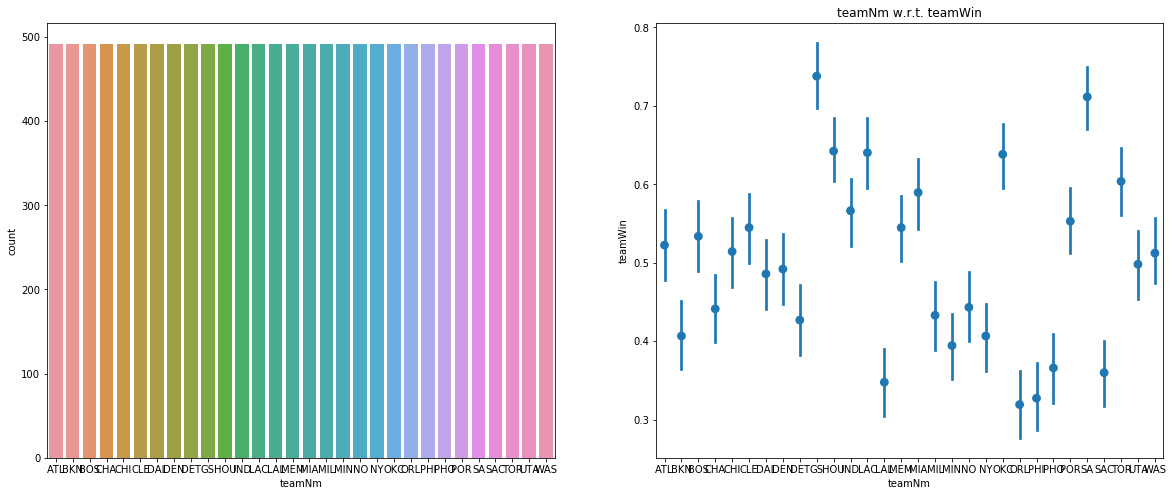

In [47]:
box_hist(team_df, 5, size='big')

Some teams have had much better win percentages over the past 6 years than others, as can be seen here. Not the prettiest plots, but definitely show the large variation between win percentages from 2012-2018 depending on the team.

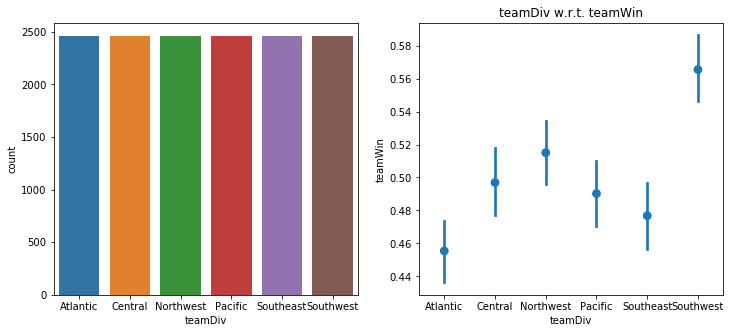

In [48]:
box_hist(team_df, 7)

Similarly, particular divisions have had more success than others over the recent years. Especially the Southwest division.

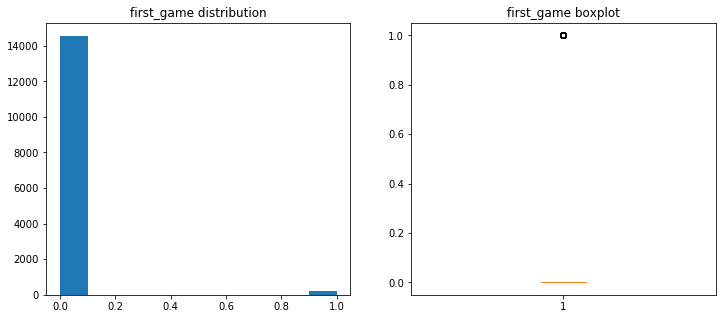

In [49]:
box_hist(team_df, 8)

There's a small number of first games, ultimately these will be eliminated when we finally select features, as many of the stat variables will be on rolling windows of averages (making first game instances obsolete).

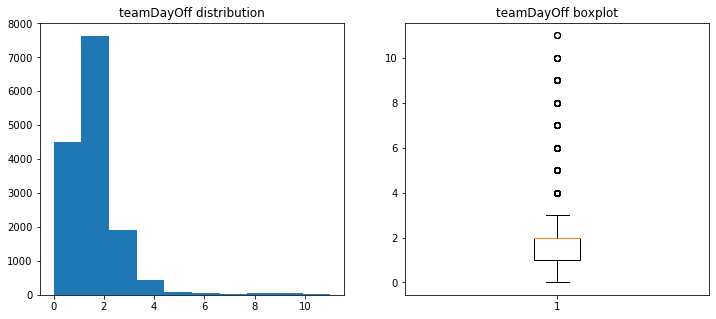

In [50]:
box_hist(team_df, 9)

This is really categorical data, we can change the outliers here to 3+ days and include 3 day data as well (or 4+).

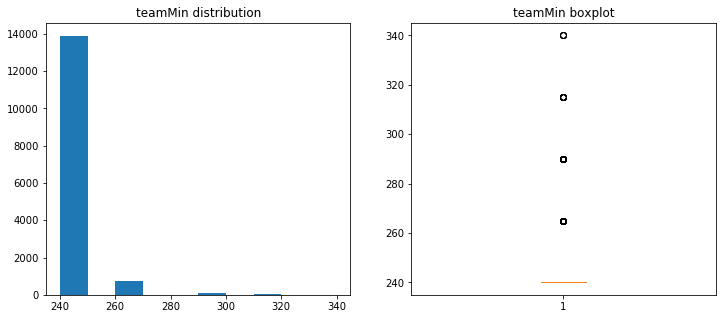

In [51]:
box_hist(team_df, 17)

We can see that it is quite rare for a game to go into overtime (beyond 240 minutes), but it does happen on occasion.

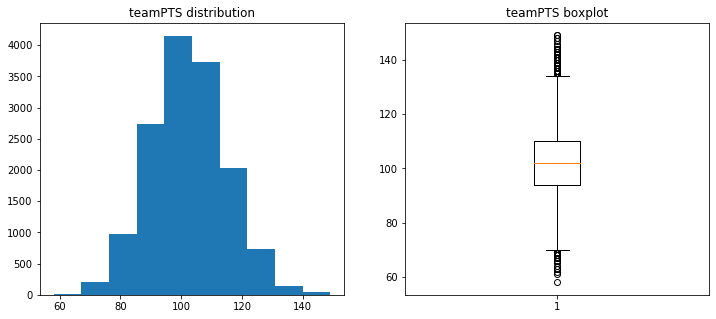

In [52]:
box_hist(team_df, 18)

This looks like a relatively normal distribution, which is fantastic! There may be some outliers now, but after creating the moving window, those will likely get smoothed out (as well as with the rest of the statistical data).

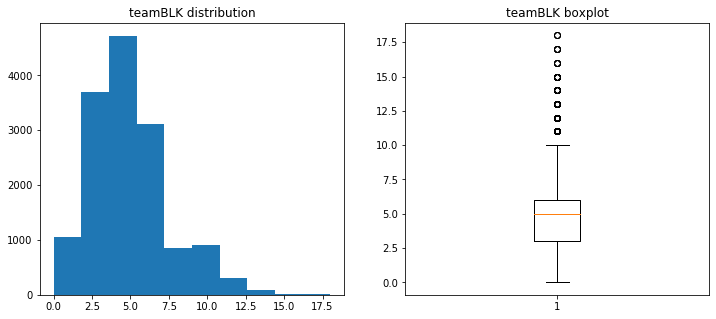

In [53]:
box_hist(team_df, 22)

Blocks, on the other hand look a little more skewed to the not occurring/zero end (with some large potential outliers), but this will likely get smoothed as well.

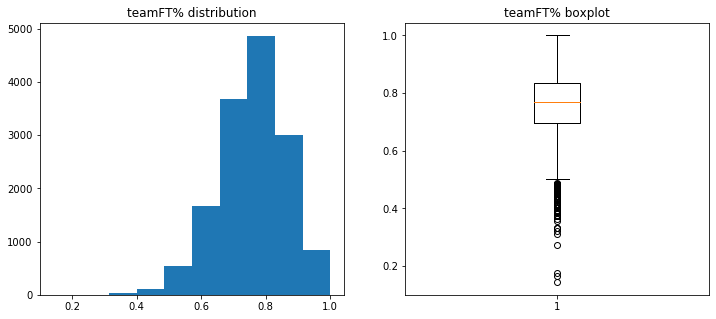

In [54]:
box_hist(team_df, 35)

Free throw percentage, contrary to blocks, tend to be higher rather than lower, with some very low outliers (likely smoothed out).

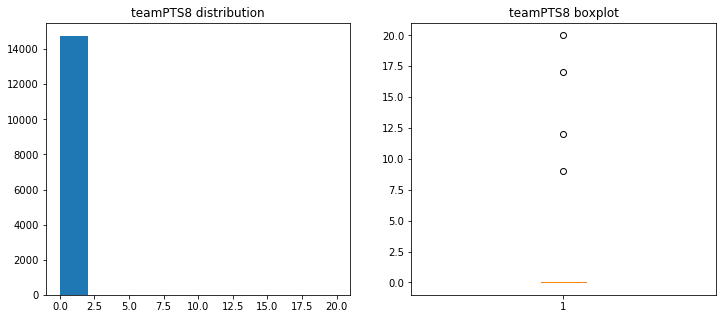

In [55]:
box_hist(team_df, 46)

We can see here that games that go to quadruple overtime are very rare! Based on the above there have only been 2 games (4 teams) since 2012 that went into quadruple overtime, it actually is quite similar with any overtime, they are relatively abnormal to see. Again this is probably best used as an indicator (similar to the teamMin variable).

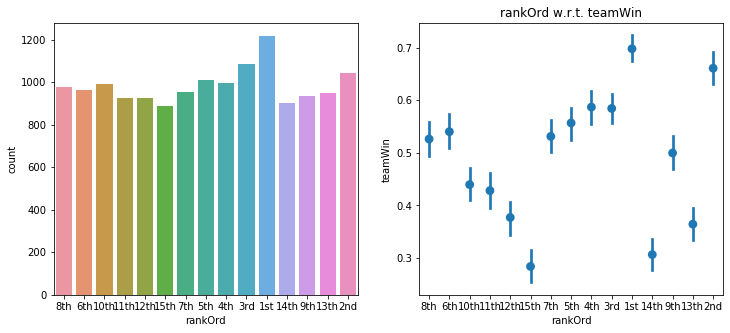

In [56]:
box_hist(team_df, 70)

To be expected, higher ranked teams have higher win percentages. It is interesting to see the relative distance between ranks, however. Note that the number of games containing higher ranked teams occurs more often due to many ties in the rankings for teams, especially in the beginning of a season.

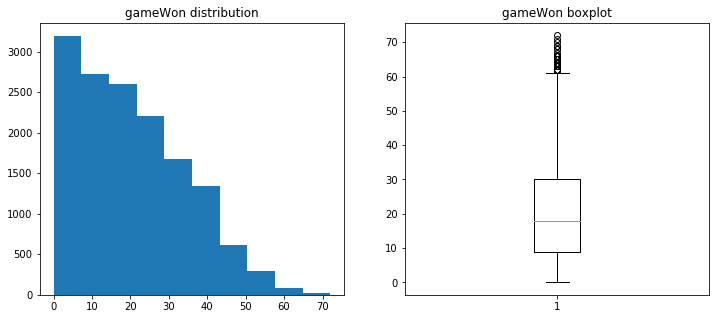

In [57]:
box_hist(team_df, 71)

This, on its own isn't very helpful, however it can be used in conjunction with other features to garner useful statistics. Also goes to show that it has been difficult for a team to get above 60 wins over this time period (out of 82 games, 60+ wins is incredibly good).

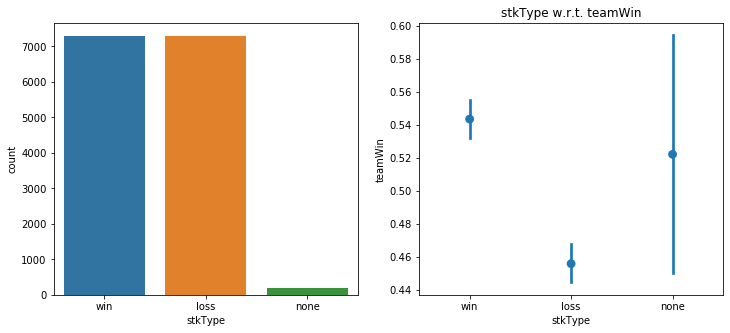

In [58]:
box_hist(team_df, 74)

Looks like if a team won its last game, it is more likely to win the one it is about to play, with the opposite also being true.

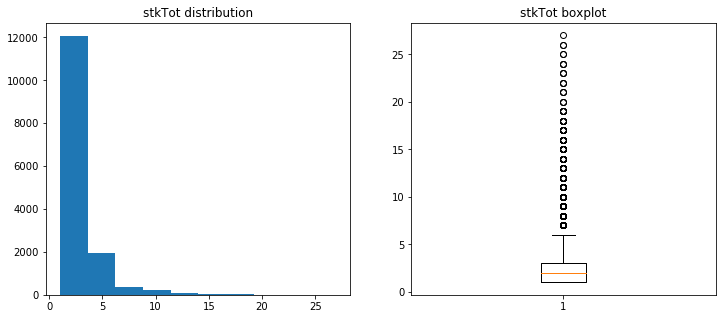

In [59]:
box_hist(team_df, 75)

Looks like there have been some huge streaks, but they may be abnormal if they get too large, may need to turn this categorical (W/L up to 5+).

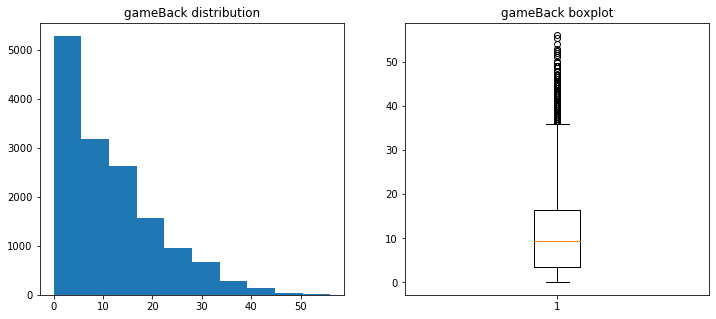

In [60]:
box_hist(team_df, 76)

This is likely very closely linked to the rank variable from earlier.

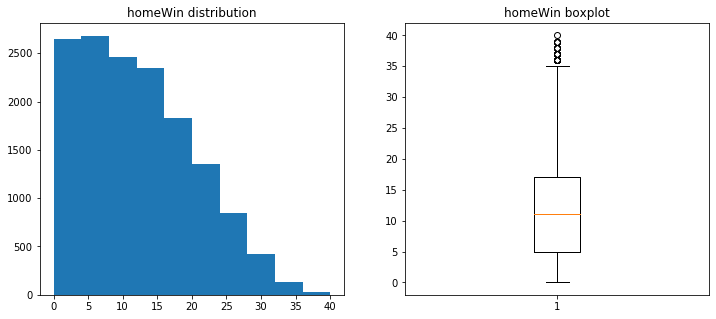

In [61]:
box_hist(team_df, 79)

It's possible we want to keep these outliers in this case, the reason being, these teams with immense amounts of home wins are probably extremely likely to win games at home (this could be used in conjunction with the teamHome variable in feature engineering).

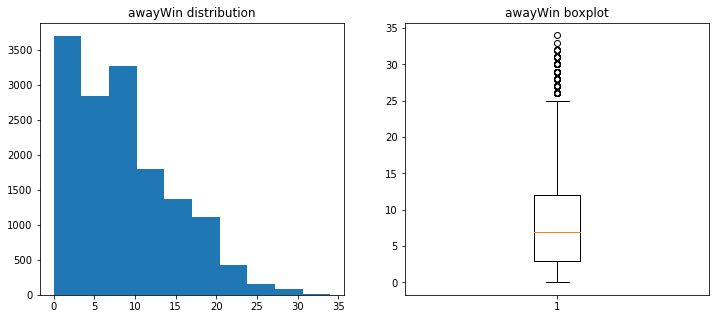

In [62]:
box_hist(team_df, 81)

Similar to the last, this could prove very useful.

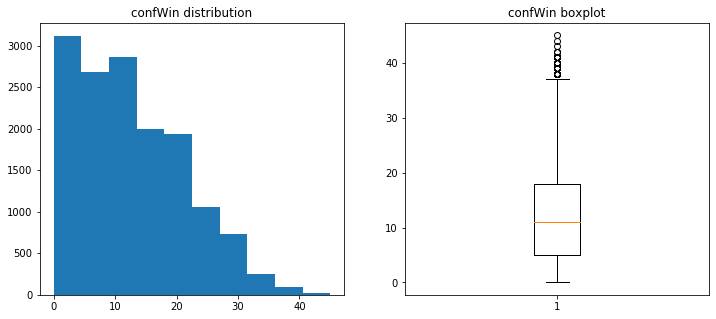

In [63]:
box_hist(team_df, 83)

This also could be useful in feature engineering (if a team generally beats those in its own conference it may be useful to know that information if they are playing a team in their conference - can likely create a variable that indicates the opposite as well).

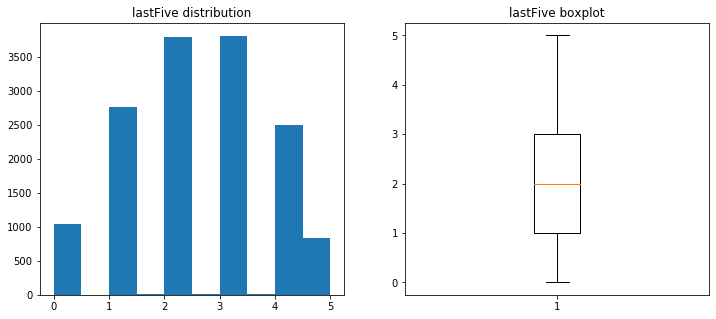

In [64]:
box_hist(team_df, 85)

This is really a category and perhaps should be treated as such (higher last five likely indicates a higher win chance).

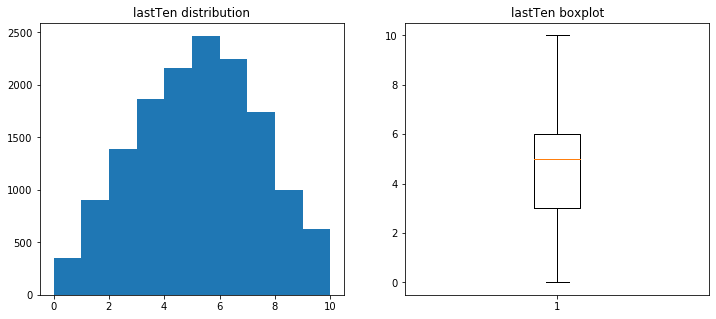

In [65]:
box_hist(team_df, 86)

Similarly to last five, last 10 could be used this way as well.

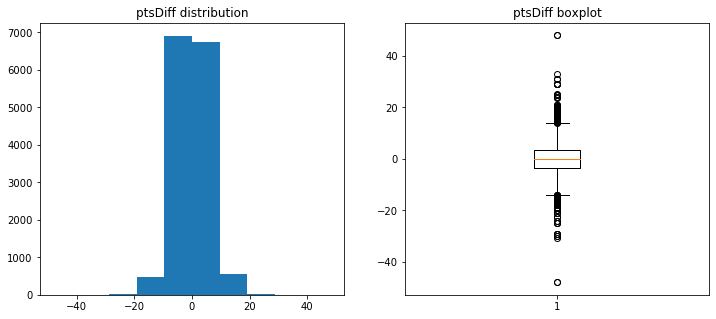

In [66]:
box_hist(team_df, 90)

This variable, based off the last two variables, have very low variability, but likely is a large indicator for a team's overall performance through the season.

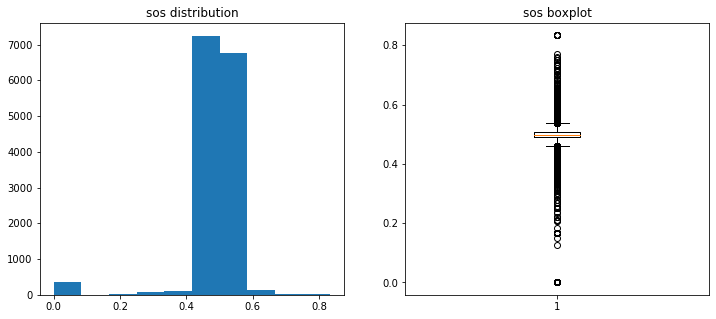

In [67]:
box_hist(team_df, 95)

I'm curious of those 0 strength values, may be of interest to look at those (certainly no team has zero strength schedule)?

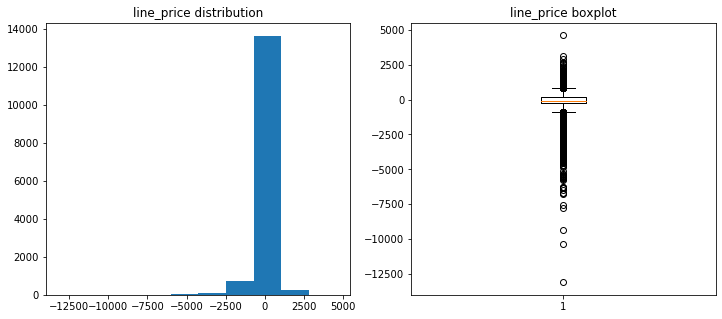

In [68]:
box_hist(team_df, 106)

This is another one with pretty extreme values, may need to wrangle these in a bit.

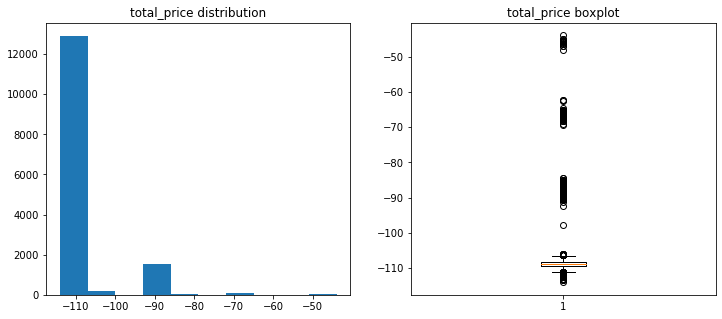

In [69]:
box_hist(team_df, 110)

This is a pretty wild looking data distribution. Certainly the oddest one I've run into (and it happens to be the last column)! Perhaps this should be converted into range groups?

So, there's a quick rundown of around 20 of the most interesting variables (from a hist/box or count/point perspective). Time to start putting things together to create some predictive features!

# Feature Engineering

There's a lot to do with the newfound knowledge from above! Feature engineering is all about taking things we have and getting them into a more predictive and potentially useful set of variables to use for modeling.

## New Features (based off the old)

First off, a number of new variables will be created based off of some of the findings in the prior section:
1. `nonconfWin` and `nonconfLoss`: indicates the number of wins and losses a team has against teams in the conference which isn't their own up to the prior game
2. `confW%` and `nonconfW%`: indicates the win percentage a team has against teams in their conference and not in their conference up to the prior game
3. `homeWin%` and `awayWin%`: indicates the win percentage a team has while playing home or away up to the prior game
4. `homeawayWin%`: which takes the indicator of whether a team is playing home or away in a particular game, then based on that assigns them either their home or away win percentage (from #3 above)
5. `ovrWin%`: the team's overall win percentage up to the prior game
6. `teamDayOffCat`: converts `teamDayOff` to a categorical variable where if a team's number of days off is 4 or greater it is listed as "4+", the rest remain the same
7. `gmOTCat`: converts minutes played into categories of regular time or overtime periods 1 through 4 for a game
8. `stkTotCat`: converts `stkTot` to a categorical variable where if a team's streak is 7 or greater it is listed as "7+", the rest remain the same
9. `stkCat`: converts original `stk` categorical variable to the new form (e.g. if `stk` is "W15" `stkCat` is "W7+")
10. `stkTotAlt`: another streak version, where a winning streak is positive and a losing streak is negative (e.g. if a team lost the last 10 games, `stkTotAlt` would be -10)
11. `lastFiveWin%` and `lastTenWin%`: the win percentage for the team over the last five and ten games, respectively

In [70]:
team_df['nonconfWin'] = team_df.gameWon - team_df.confWin
team_df['nonconfLoss'] = team_df.gameLost - team_df.confLoss

In [71]:
team_df['confW%'] = team_df.confWin / (team_df.confWin + team_df.confLoss)
team_df['nonconfW%'] = team_df.nonconfWin / (team_df.nonconfWin + team_df.nonconfLoss)

In [72]:
team_df['homeWin%'] = team_df.homeWin / (team_df.homeWin + team_df.homeLoss)
team_df['awayWin%'] = team_df.awayWin / (team_df.awayWin + team_df.awayLoss)

In [73]:
team_df['homeawayWin%'] = (team_df.teamHome * team_df['homeWin%']) + (((team_df.teamHome == 0).astype('int')) * team_df['awayWin%'])

In [74]:
team_df['ovrWin%'] = team_df.gameWon / team_df.gamePlay

In [75]:
team_df['teamDayOffCat'] = pd.cut(team_df.teamDayOff, bins=[0,1,2,3,4,12], labels=['0', '1', '2', '3', '4+'], right=False)

In [76]:
team_df['gmOTCat'] = pd.cut(team_df.teamMin, bins=[0,250,280,300,330,350], labels=['Reg', 'OT1', 'OT2', 'OT3', 'OT4'])

In [77]:
team_df['stkTotCat'] = pd.cut(team_df.stkTot, bins=[0,1,2,3,4,5,6,28], labels=['1','2','3','4','5','6','7+'])

In [78]:
team_df['stkCat'] = team_df.stk.str[0] + team_df.stkTotCat.astype('object')

In [79]:
team_df['stkTotAlt'] = team_df.stkType.apply(lambda x: 1 if x == 'win' else (-1 if x == 'loss' else 0)) * team_df.stkTot

In [80]:
team_df['lastFiveWin%'] = team_df.lastFive / 5
team_df['lastTenWin%'] = team_df.lastTen / 10

With 15 new variables, hopefully some of these will be useful!

## Taking Differences of Numerical Data

In order to get even more potentially predictive features, for each game played from each team's perspective, differences will be taken for each corresponding numerical column. First, the dataframe needs to be reformatted back to the versus format.

In [81]:
joined = team_df.join(team_df, lsuffix=('_A'), rsuffix=('_B'), how='outer').copy()
combo_df = joined[joined.teamNm_A != joined.teamNm_B].reset_index(drop=True).copy()
combo_df.shape

(14758, 252)

Get the team A columns and team B columns once again.

In [82]:
a_cols = combo_df.columns[combo_df.columns.str.endswith('_A')]
b_cols = combo_df.columns[combo_df.columns.str.endswith('_B')]

Then with this for loop, all the corresponding numerical data columns will have B data subtracted from A data (i.e. A - B), then that difference will be appended to the end of the `combo_df` (versus dataframe) in the format *variableName_AB_Diff*.

In [83]:
for a, b in zip(a_cols, b_cols):
    if is_numeric_dtype(combo_df[a]) == True:
        combo_df[a + 'B_Diff'] = combo_df[a] - combo_df[b]

combo_df.shape

(14758, 361)

With that one for loop, the number of variables have gone from 252 (both teams included) to 361 (both teams included). That's a lot of differenced variables!

## Let's get Rolling

Getting very close to a lot of potentially predictive variables! Now, a lot of the data in each row contains information for each game for teams A and B. But for predictive purposes, this doesn't help us at all. I can easily look at a row's team A pts and team B pts and tell you who won the game. But what about the ultimate goal of predicting the outcome of a game, whether team A or B will win (without knowing the box score for a game that potentially hasn't happened yet)? How can this be done? Well, what if for each game we used the moving averages for most of the box score data (and the differences) over the last K games played? The primary drawback of this method is the inability to predict a first game and the potential for future model overfitting. But if we could find the optimal last K number of games, perhaps that is also a good way to estimate how a team will approximately do on a particular game? That is where `.rolling()` comes in handy, as well as good old addition and subtraction. Using a big loop (soon), various moving averages will be compared to the actual values during a game (by adding the absolute value of each difference in each column). This is where the overfitting fear comes into play, but it also helps us to find the optimal (reasonably small K). 

First, get the data back into single team format, dropping the unnecessary parts of the suffixes (the "AB's" and "A's" - note the first step gets rid of any B columns already) as well as columns that really didn't add anything by being subtracted from one another.

In [84]:
team_comp = combo_df.drop(columns=b_cols).copy()
team_comp.columns = team_comp.columns.str.replace('_AB', '').str.replace('_A', '')
team_comp = team_comp.drop(columns=['gameID_Diff', 'seasID_Diff', 'first_game_Diff', 'teamMin_Diff', 'poss_Diff']).copy()

Create a list of columns that we ultimately want to make a moving average for.

In [85]:
rolling_cols = ['teamWin'] + team_comp.columns[17:69].tolist() + team_comp.columns[126: 180].tolist()

Create the dataframe, `rolling_df`, containing identifying variables as well as rolling columns chosen above.

In [86]:
rolling_df = team_comp[['gameID', 'seasID', 'gmDate', 'teamNm', 'first_game'] + rolling_cols].copy()

Create a scaler to get everything into positive (and small) terms. This is used to get every value between 0 and 1, so all differences are relatively small (because a lot of differences will be taken). Ultimately, variables will be transformed back to their unscaled version after the optimal K is determined.

In [87]:
scaler = MinMaxScaler()

The rolling columns are the only ones that are scaled (because they are the only ones being compared).

In [88]:
scaled_data = pd.DataFrame(scaler.fit_transform(rolling_df[rolling_cols]), columns=rolling_cols)

Drop the original rolling columns (unscaled data) and put on the new scaled rolling columns.

In [89]:
rolling_df = rolling_df.drop(columns=rolling_cols).join(scaled_data).copy()

This is a bit of a monstrous loop, but in essense, it isn't very complicated. Ultimately, it's creating multiple rolling window means dataframes for our data for last games being in the K range of 1 to 10 (we don't want K to be too large, or else a lot of the start of the season will be cut off). With each rolling window dataframe it then takes the new rolling values and subtracts them from the original (non-rolling) values. The goal is to get the rolling value K that keeps us closest to the original data (i.e. the actual individual game data). It then stores the sum of the absolute values of the differences for each potential rolling K. Once the minimum sum dataframe K is determined, it creates a new dataframe with the rolling K data using that value of K and shifts all that data forward one game.

In [90]:
total_diffs = []

for i in range(1, 11):
    total_team_diffs = []
    
    for team in rolling_df.teamNm.unique():
        team_seas_diffs_sqrts = []
        
        for seas in rolling_df[rolling_df.teamNm == team].seasID.unique():
            temp_team_df = rolling_df[(rolling_df.teamNm == team) & (rolling_df.seasID == seas)].sort_values('gmDate').copy()
            temp_rolling_df = temp_team_df[rolling_cols].rolling(i, 1, win_type='triang').mean().shift().iloc[1:].copy()
            one_team_seas_diffs_sqrt = (temp_team_df[rolling_cols].iloc[1:] - temp_rolling_df).abs().sum().sum()**(1/2)
            team_seas_diffs_sqrts.append(one_team_seas_diffs_sqrt)
            
        total_team_diffs.append(np.array(team_seas_diffs_sqrts).sum())
        
    total_diffs.append(np.array(total_team_diffs).sum())
    
min_diff, min_loc = np.array(total_diffs).min(), np.argmin(np.array(total_diffs))
min_k = min_loc + 1

dfs = []

for team in rolling_df.teamNm.unique():
    for seas in rolling_df[rolling_df.teamNm == team].seasID.unique():
        temp_team_df = rolling_df[(rolling_df.teamNm == team) & (rolling_df.seasID == seas)].sort_values('gmDate').copy()
        temp_rolling_df = temp_team_df[rolling_cols].rolling(min_k, 1, win_type='triang').mean().shift().copy()
        dfs.append(temp_rolling_df)
        
min_rolling_df = pd.concat(dfs).copy()
min_rolling_df = rolling_df.drop(columns=rolling_cols).join(min_rolling_df).copy()
min_k

9

Looks like the lowest sum of differences was on the K=9 dataframe, we now have our optimal sliding window. That is, the one that most closely resembles the actual game data. Now, let's return that scaled data back to its unscaled counterpart.

In [91]:
inverse_rolling_df = pd.DataFrame(scaler.inverse_transform(min_rolling_df[rolling_cols]), columns=rolling_cols)

Essentially rename the `teamWin` variable to `teamWin%_last9`, because that is a more accurate description of what this variable has been transformed into.

In [92]:
inverse_rolling_df['teamWin%_last9'] = inverse_rolling_df.teamWin.copy()
inverse_rolling_df = inverse_rolling_df.drop(columns='teamWin')

Remove `teamWin` from the rolling columns, as we really do need this one in its original form (it is the target afterall!).

In [93]:
rolling_cols.remove('teamWin')

Finally, take `team_comp` from the beginning of this sub-section, drop the "rolling columns" in name only and append the actual rolling columns from `inverse_rolling_df`.

In [94]:
team_comp_roll = team_comp.drop(columns=rolling_cols).join(inverse_rolling_df).copy()

There we have it. A whole lot of moving window variables that resemble (as closely as possible) the original game data. And now everything is in `team_comp_roll`.

## Final feature engineering touches

Create `sameConf` variable that describes if the teams playing one another are in the same conference.

In [95]:
team_comp_roll['sameConf'] = (team_comp_roll.teamConf_W_Diff == 0).astype('int').copy()

Create `confMatchupWin%` variable that takes into account the opposing team's conference and the team's win percentage against appropriate conference.

In [96]:
team_comp_roll['confMatchupWin%'] = team_comp_roll.sameConf * team_comp_roll['confW%'] + (team_comp_roll.sameConf == 0) * team_comp_roll['nonconfW%']

Drop some useless columns that don't add anything.

In [97]:
team_comp_roll = team_comp_roll.drop(columns=['teamWin_Diff', 'teamConf_W_Diff', 'teamHome_Diff']).copy()

Put the data back into the versus format by creating a list of identical columns, then once again, merging the data to itself (and appending team A and team B suffixes where appropriate). Then again, getting rid of any same team opponents.

In [98]:
identical_cols = ['gameID', 'seasID', 'gmDate', 'gmTime', 'first_game', 'offLNm1', 'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'gmOTCat']

vs_df = pd.merge(team_comp_roll, team_comp_roll, suffixes=['_A', '_B'], on=identical_cols).copy()
vs_df = vs_df[vs_df.teamNm_A != vs_df.teamNm_B].copy()
vs_df.shape

(14758, 448)

Create another differenced variable, `confMatchupWin%Diff` that takes the difference between team A and team B in terms of their conference matchup win percentages.

In [99]:
vs_df['confMatchupWin%Diff'] = vs_df['confMatchupWin%_A'] - vs_df['confMatchupWin%_B']

Create random dataframes (where identities for team A and team B are selected randomly) until the average win percentage for team A and also for team B are very close to 50%. In essense, this is getting the data down to the game level (rather than having 2 rows for each game - there is now only 1).

In [100]:
mean = 0
while (mean <= .4999) or (mean >= .5001):
    vs_rand_df = vs_df.sample(frac = 1.0).groupby('gameID').head(1).copy()
    mean = vs_rand_df.teamWin_A.mean()
mean

0.5000677598590595

## Trimming the fat

Check out the size of the versus dataframe as well as the number of rows for each variable.

In [101]:
print(vs_rand_df.shape)
print(vs_rand_df.shape[0]/vs_rand_df.shape[1])

(7379, 449)
16.434298440979955


So, there are a lot of variables here! Many are likely opposites (one negative and one positive) of one another. Let's get rid of some of these variables.

Yet again, split columns into team A and team B specific lists.

In [102]:
a_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_A')]
b_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_B')]

Check to see if any corresponding numerical A/B columns are simply opposites of one another. If they are, keep team A information and drop team B.

In [103]:
for a, b in zip(a_cols, b_cols):
    if is_numeric_dtype(vs_rand_df[a]):
        ck_inverse = (vs_rand_df[a] == (vs_rand_df[b]*(-1))).mean()
    if ck_inverse == 1:
        vs_rand_df[a.replace('_A', '')] = vs_rand_df[a].copy()
        vs_rand_df.drop(columns=[a, b], inplace=True)

Looks like 49 variables were identical and just opposites! Certainly makes things easier.

In [104]:
vs_rand_df.shape

(7379, 404)

Cleanup some columns.

In [105]:
vs_rand_df['sameConf'] = (vs_rand_df.teamConf_W_A == vs_rand_df.teamConf_W_B).astype('int')

In [106]:
vs_rand_df['confMatchupWin%_A'] = (vs_rand_df['confW%_A'] * vs_rand_df['sameConf']) + (vs_rand_df['nonconfW%_A'] * (vs_rand_df['sameConf'] == 0))
vs_rand_df['confMatchupWin%_B'] = (vs_rand_df['confW%_B'] * vs_rand_df['sameConf']) + (vs_rand_df['nonconfW%_B'] * (vs_rand_df['sameConf'] == 0))
vs_rand_df['confMatchupWin%Diff'] = vs_rand_df['confMatchupWin%_A'] - vs_rand_df['confMatchupWin%_B']

In [107]:
vs_rand_df.drop(columns=['teamWin_B', 'teamHome_B', 'sameConf_A', 'sameConf_B'], inplace=True)

Drop all rows containing first games.

In [108]:
vs_rand_df = vs_rand_df[vs_rand_df.first_game == 0].copy()

In [109]:
vs_rand_df.shape

(7276, 401)

That's better, but it's still a lot of variables. There's sure to be a large number of these that are highly collinear with one another, which leads to the next variable reducing technique.

## A Note on Categorical Columns

In [110]:
vs_rand_df.select_dtypes(include=['category', 'object']).columns

Index(['gmDate', 'gmTime', 'teamNm_A', 'teamDiv_A', 'offLNm1', 'offFNm1',
       'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'rankOrd_A', 'stk_A',
       'stkType_A', 'teamDayOffCat_A', 'gmOTCat', 'stkTotCat_A', 'stkCat_A',
       'teamNm_B', 'teamDiv_B', 'rankOrd_B', 'stk_B', 'stkType_B',
       'teamDayOffCat_B', 'stkTotCat_B', 'stkCat_B'],
      dtype='object')

At the end of the day, I don't want to use any of these categorical variables for prediction. The reason for this is that basically all of these can change in the future, or they have more descriptive/analogous versions in the numerical set. For the categorical variables of streak type and the like, better variables have already been derived from similar data. Therefore categorical variables for this dataset will be removed. Also team name and division will be removed as well, it's likely these are very strong indicators for particular teams and divisions. However, these things can change drastically over time. In order to keep relatively consistent results over the years, it will primarily be game and season aggregate statistics and features derived from those that will be included in the primary feature set.

## Multicollinearity

If variables are very highly correlated with one another, it doesn't generally help much to include both in the upcoming modeling section. So, what can be done? Well, we'll take a look at every column and see how much it correlates with every other column in the dataset, if they are correlated higher than a certain threshold, the one that correlates more highly with the target will be kept while the other one will be discarded.

Get the numerical columns.

In [111]:
num_cols = vs_rand_df.select_dtypes(include=np.number).columns

Create dataframe `X` containing only numerical columns from `vs_rand_df`.

In [112]:
X = vs_rand_df[num_cols].copy()

With the creation of so many new variables after the missing values were taken care of, there are once again null values, but we'll see how many of these survive the multicollinearity test ahead.

In [113]:
null_cols = X.columns[X.isna().any()].tolist()

Create a function `get_correlated_cols()` that will go through a dataframe, compare each numeric variable with every other numeric variable by means of Pearson's correlation coefficient. If the coefficient of two variables is above a certain threshold, it will then compare both variables to the target, and whichever one has a lower correlation to the target will get added to a list (or `drop_cols` here). If two variables happen to have the same correlation to the target, then they get added to another list (or `inspect_cols`). It ultimately returns to you two potential lists for further inspection or dropping.

In [114]:
def get_correlated_cols(df, target_col, thresh=.75):
    num_cols = df.select_dtypes(include=np.number).columns
    X = df[num_cols].copy() #numeric columns only!
    
    drop_cols = []
    inspect_cols = []
    for col in X.loc[:, X.columns != target_col].columns:

        high_corr_col = []

        for col2 in X.loc[:, X.columns != target_col].columns.drop(col):
            corr = X[col].corr(X[col2])
            if corr > thresh:
                high_corr_col.append(col2)

        if len(high_corr_col) > 0:

            cols_corrs = {col:abs(X.teamWin_A.corr(X[col]))}
            for colx in high_corr_col:
                cols_corrs[colx] = abs(X.teamWin_A.corr(X[colx]))

            max_corr = max(cols_corrs.items(), key=lambda x: x[1])
            drops = []
            inspects = []
            for key, value in cols_corrs.items():
                if value != max_corr[1]:
                    drops.append(key)
                elif value == max_corr[1]:
                    inspects.append(key)

            for item in drops:
                if item not in drop_cols:
                    drop_cols.append(item)

            if len(inspects) > 1:
                for item in inspects:
                    if (item not in inspect_cols) and (item not in drop_cols):
                        inspect_cols.append(item)

    for col in inspect_cols:
        if col in drop_cols:
            inspect_cols.remove(col)
    
    return drop_cols, inspect_cols

Call the function on the dataframe `X` with respect to the target variable `teamWin_A`.

In [115]:
drop_cols, inspect_cols = get_correlated_cols(X, 'teamWin_A', thresh=.7)

In [116]:
len(drop_cols), len(inspect_cols)

(269, 0)

There are a lot of highly correlated columns here, in this case, we keep the columns more correlated with the outcome variable while dropping those that are less correlated.

In [117]:
X = X.drop(columns=drop_cols).copy()

In [118]:
drop2_cols = []
for col in null_cols:
    if col in X.columns:
        print(f'\'{col}\' still contains nulls, but is highly correlated enough with other columns in order to drop.')
        drop2_cols.append(col)

In [119]:
X = X.drop(columns=drop2_cols).copy()

That takes care of all the columns that had nulls.

In [120]:
X.shape

(7276, 107)

This brought the number of features down significantly! Turns out a very large number of these features were highly collinear.

## Low Correlation

Another type of correlation that is not very helpful is very low correlation. If a certain variable is very uncorrelated with the target, it will likely not have as large of an effect on the outcome than more highly correlated variables. So let's trim things down a little bit further.

This finds the columns with very low correlation.

In [121]:
low_corr = []
for col in X.columns[1:]:
    corr = abs(X.teamWin_A.corr(X[col]))
    if corr < .1:
        low_corr.append((col, corr))
len(low_corr)

80

Drop the low correlation variables and rename dataframe.

In [122]:
target_features = X.drop(columns=[i[0] for i in low_corr]).copy()

In [123]:
target_features.shape

(7276, 27)

The total number of features are down significantly. Hopefully they will make for good predictors!

# Final Changes and Export

In [124]:
target_features.columns

Index(['teamWin_A', 'first_game', 'teamHome_A', 'gameBack_A', 'ptsAllow_A',
       'teamPTS1_A', 'teamDrtg_A', 'team3PM_Diff_A', 'teamDRB_Diff_A',
       'teamPTS1_Diff_A', 'teamPTS2_Diff_A', 'teamPTS3_Diff_A',
       'teamBLKR_Diff_A', 'teamAST/TO_Diff_A', 'lastFiveWin%_B', 'teamDrtg_B',
       'team3PM_Diff_B', 'teamPTS1_Diff_B', 'teamPTS3_Diff_B',
       'teamBLKR_Diff_B', 'teamAST/TO_Diff_B', 'ptsAgnst_Diff',
       'ptsScore_Diff', 'ptsAllow_Diff', 'opptOpptGmWon_Diff', 'spread_Diff',
       'lastFiveWin%_Diff'],
      dtype='object')

Drop `first_game` as it doesn't change at all (all first games have already been removed).

In [125]:
target_features = target_features.drop(columns='first_game').copy()

## An unfortunate feature casualty: `opptOpptGmWon_Diff`

Unfortunately, `opptOpptGmWon_Diff`, which turns out to be a good linear predictor for results of games, must be removed. The reason for this is that in the model testing phase, all the features here must be recreated using raw data from other sources. Ultimately, I am unsure of how `opptOpptGmWon` was originally calculated by the source of this data. Thus, my attempts to recreate `opptGmWon`, which is a prerequisite for `opptOpptGmWon`, did not work out as expected. However, I also happen to know that shedding this feature does not effect the modeling phase by a very large margin at all; most model performance metrics drop only tenths of a percent. Therefore `opptOpptGmWon_Diff` will be removed from the feature set.

In [126]:
target_features = target_features.drop(columns='opptOpptGmWon_Diff').copy()

Final look at dimensions of data.

In [127]:
target_features.shape

(7276, 25)

Export data.

In [128]:
target_features.to_csv('C:/Users/philb/Google Drive/Thinkful/Thinkful_repo/projects/supervised_capstone/Export Data/target_features.csv')

# Quick Recap

The aggregated data from step one has now been cleaned, explored and feature engineered. Modeling can now be conducted on the features in this exported feature set.

Next step, [NBA Modeling](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Modeling.ipynb).

For navigational convenience:
1. [NBA Data Aggregation](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Data_Aggregation.ipynb)
2. [NBA Data Cleaning and Exploration](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Data_Cleaning_Exploration.ipynb)*
3. [NBA Modeling](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Modeling.ipynb)
4. [NBA Model Testing](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/supervised_capstone/Jupyter%20Notebooks/Model_Testing.ipynb)